# <span style="color:#756bb1">Test di Adattamento</span>
## Esercizi

## <span style="color:#e6550d">Distribuzione di <b><i>Poisson (λ incognito)</i></b> (Esercizio 1)</span>

![Screenshot 2024-01-02 at 15.37.06.png](<attachment:Screenshot 2024-01-02 at 15.37.06.png>) ![Screenshot 2024-01-02 at 15.37.13.png](<attachment:Screenshot 2024-01-02 at 15.37.13.png>)
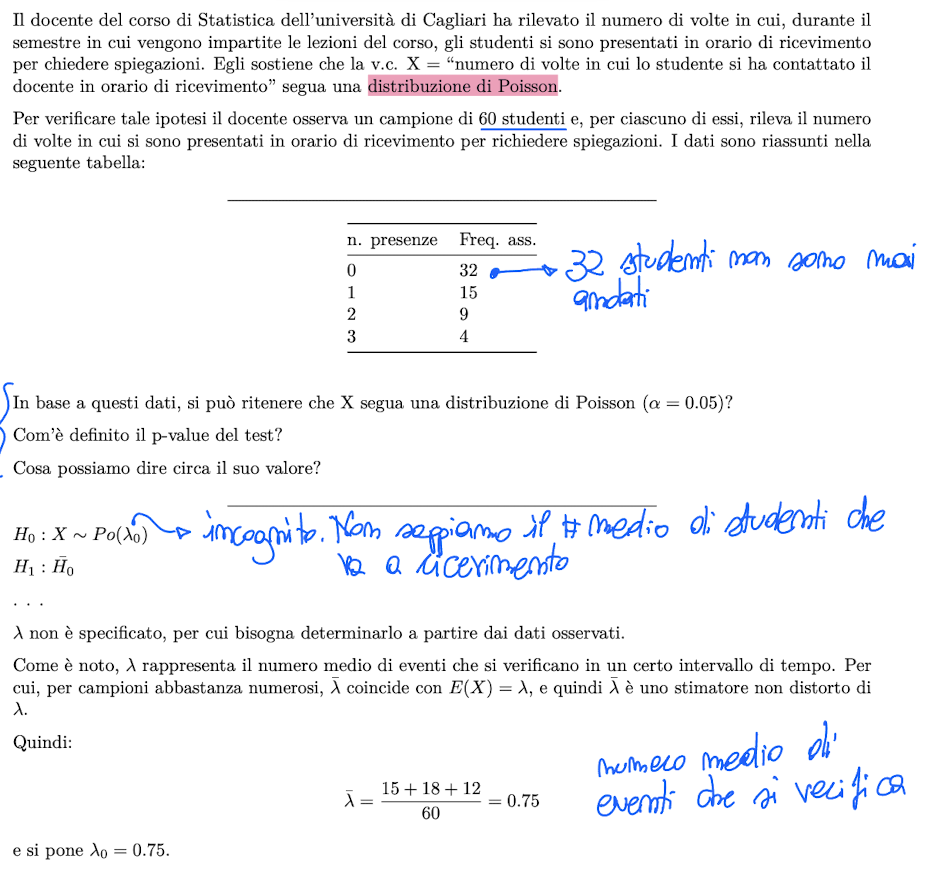
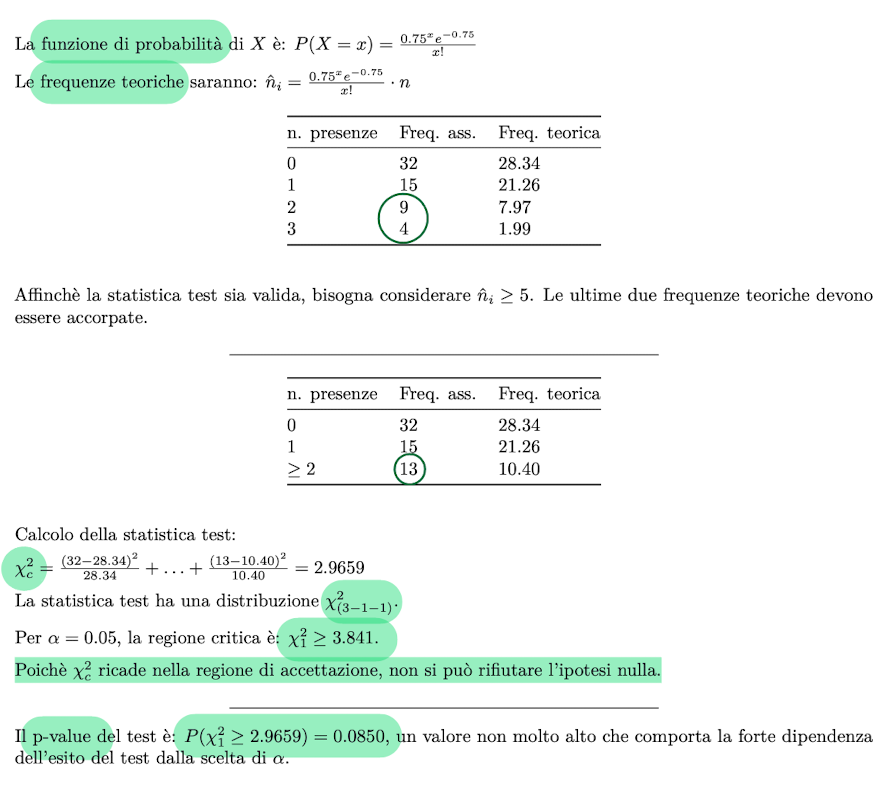

![Screenshot 2024-01-02 at 15.32.04.png](<attachment:Screenshot 2024-01-02 at 15.32.04.png>)
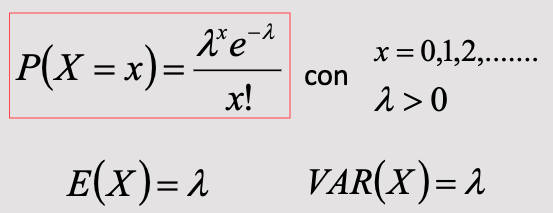

In [3]:
# H0: la variabile segue una distribuzione di Poisson di parametro λ incognito

# Frequenze osservate originali
freq_oss <- c(32, 15, 9, 4) # Frequenze per 0, 1, 2, 3 presenze
cat("Frequenze osservate originali:", freq_oss, "\n")

# Calcolo di lambda basato sulle frequenze osservate aggiustate
lambda <- sum((0:(length(freq_oss) - 1)) * freq_oss) / sum(freq_oss)
cat("Lambda calcolato:", lambda, "\n")

# Calcolo delle frequenze teoriche originali
freq_teo_orig <- dpois(0:2, lambda) * sum(freq_oss)
freq_teo_orig <- c(freq_teo_orig, sum(freq_oss) - sum(freq_teo_orig)) # Frequenza per 3+
cat("Frequenze teoriche originali:", freq_teo_orig, "\n")

# Aggiustamento delle frequenze osservate e teoriche
for (i in length(freq_oss):2) {
  if (freq_oss[i] < 5) {
    freq_oss[i-1] <- freq_oss[i-1] + freq_oss[i]
    freq_teo_orig[i-1] <- freq_teo_orig[i-1] + freq_teo_orig[i]
    freq_oss <- freq_oss[-i]
    freq_teo_orig <- freq_teo_orig[-i]
  }
}
cat("Frequenze osservate aggiustate:", freq_oss, "\n")
cat("Frequenze teoriche aggiustate:", freq_teo_orig, "\n")

# Calcolo della statistica test chi-quadro
chi_sq <- sum((freq_oss - freq_teo_orig)^2 / freq_teo_orig)
cat("Statistica test chi-quadro:", chi_sq, "\n")

# Gradi di libertà aggiustati
df <- length(freq_oss) - 1 - 1
cat("Gradi di libertà:", df, "\n")

# Calcolo del valore critico per α = 0.05
chi_critico <- qchisq(0.95, df)
cat("Valore critico:", chi_critico, "\n")

# Decisione
if (chi_sq > chi_critico) {
  cat("Rifiutiamo l'ipotesi nulla: la variabile non segue una distribuzione di Poisson.")
} else {
  cat("Non possiamo rifiutare l'ipotesi nulla: la variabile potrebbe seguire una distribuzione di Poisson.")
}

Frequenze osservate originali: 32 15 9 4 
Lambda calcolato: 0.75 
Frequenze teoriche originali: 28.34199 21.25649 7.971186 2.430326 
Frequenze osservate aggiustate: 32 15 13 
Frequenze teoriche aggiustate: 28.34199 21.25649 10.40151 
Statistica test chi-quadro: 2.962772 
Gradi di libert`a: 1 
Valore critico: 3.841459 
Non possiamo rifiutare l'ipotesi nulla: la variabile potrebbe seguire una distribuzione di Poisson.

## <span style="color:#e6550d">Distribuzione di <b><i>Binomiale (P0 incognito)</i></b> (Esercizio 2)</span>

![Screenshot 2024-01-02 at 15.37.51.png](<attachment:Screenshot 2024-01-02 at 15.37.51.png>) ![Screenshot 2024-01-02 at 15.38.03.png](<attachment:Screenshot 2024-01-02 at 15.38.03.png>)
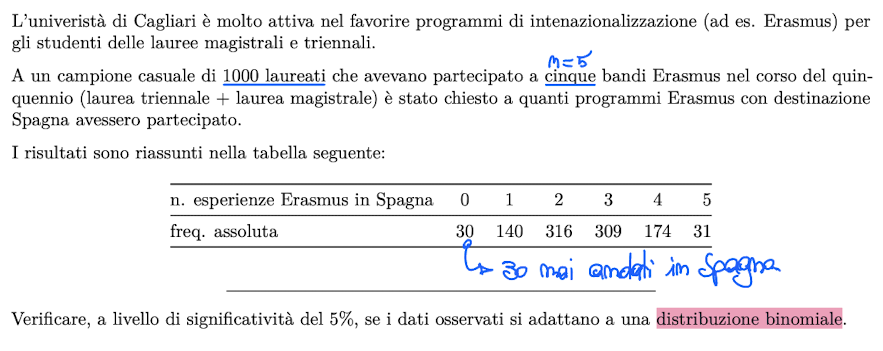
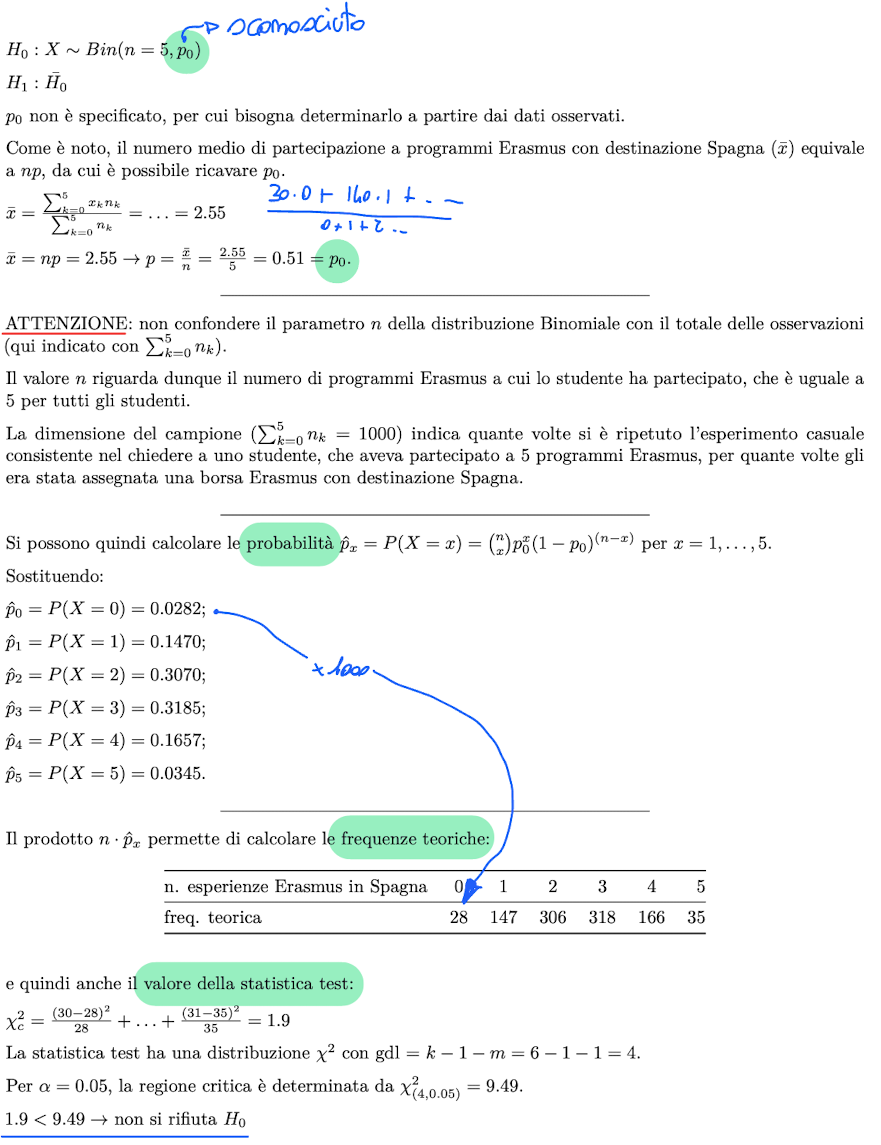

![Screenshot 2024-01-02 at 15.55.38.png](<attachment:Screenshot 2024-01-02 at 15.55.38.png>)
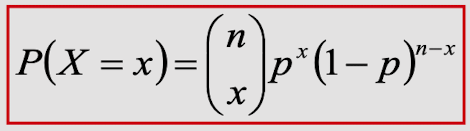

In [69]:
# Frequenze osservate
freq_oss <- c(30, 140, 316, 309, 174, 31) # Frequenze per 0, 1, 2, 3, 4, 5 esperienze
cat("Frequenze osservate:", freq_oss, "\n")

# Calcolo di p0
n <- 5 # Numero totale di tentativi (programmi Erasmus)
x_media <- sum(0:5 * freq_oss) / sum(freq_oss)
cat("Media:", x_media, "\n")
p0 <- x_media / n
cat("p0:", p0, "\n")

# Calcolo delle frequenze teoriche
freq_teo <- dbinom(0:5, size = n, prob = p0) * sum(freq_oss)
cat("Frequenze teoriche:", freq_teo, "\n")

# Calcolo della statistica test chi-quadro
chi_sq <- sum((freq_oss - freq_teo)^2 / freq_teo)
cat("Statistica test chi-quadro:", chi_sq, "\n")

# Gradi di libertà
df <- length(freq_oss) - 1 - 1 # Numero categorie - 1 - parametri stimati
cat("Gradi di libertà:", df, "\n")

# Calcolo del valore critico per α = 0.05
chi_critico <- qchisq(0.95, df)
cat("Valore critico:", chi_critico, "\n")

# Decisione
if (chi_sq > chi_critico) {
  cat("Rifiutiamo l'ipotesi nulla: la distribuzione non è binomiale.")
} else {
  cat("Non possiamo rifiutare l'ipotesi nulla: la distribuzione potrebbe essere binomiale.")
}


Frequenze osservate: 30 140 316 309 174 31 
Media: 2.55 
p0: 0.51 
Frequenze teoriche: 28.24752 147.0024 306.005 318.4951 165.7474 34.50253 
Statistica test chi-quadro: 1.818268 
Gradi di libert`a: 4 
Valore critico: 9.487729 
Non possiamo rifiutare l'ipotesi nulla: la distribuzione potrebbe essere binomiale.

## <span style="color:#e6550d">Distribuzione <b><i>Normale (media e varianza incognite)</i></b> (Esercizio 3)</span>

![Screenshot 2024-01-02 at 15.38.40.png](<attachment:Screenshot 2024-01-02 at 15.38.40.png>) ![Screenshot 2024-01-02 at 15.38.50.png](<attachment:Screenshot 2024-01-02 at 15.38.50.png>)
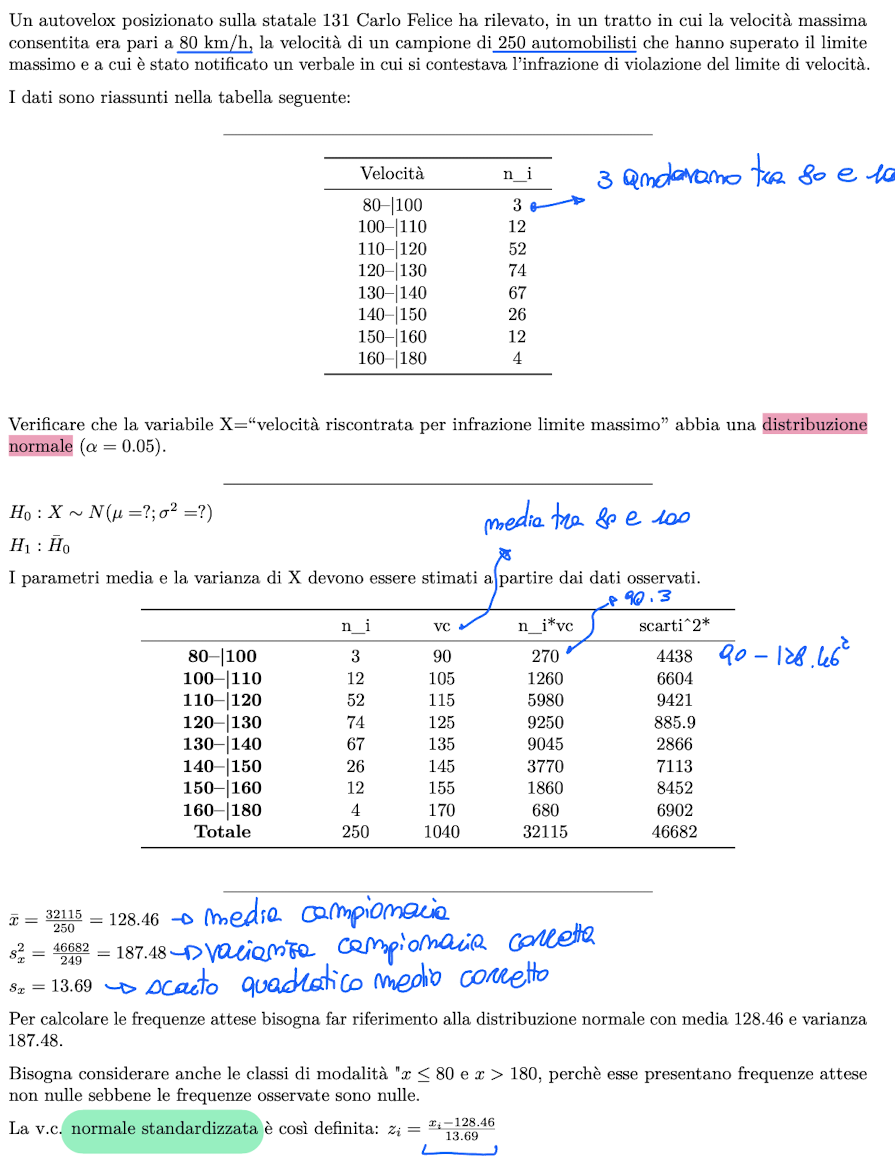
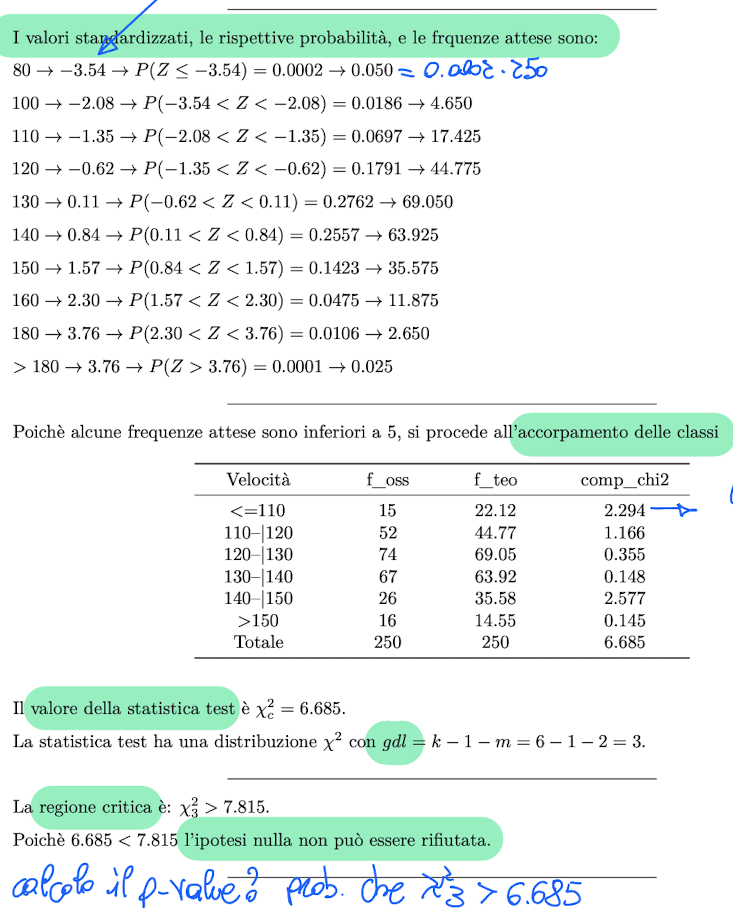

#### <span style="color:#3182bd">Con accorpamento delle classi</span>

In [29]:
# Limiti originali degli intervalli di velocità
estremi_intervalli_originali <- c(80, 100, 110, 120, 130, 140, 150, 160, 180) # Limiti originali

# Dati osservati
velocita_medie <- c(90, 105, 115, 125, 135, 145, 155, 170) # Punti medi degli intervalli
frequenze_oss <- c(3, 12, 52, 74, 67, 26, 12, 4) # Frequenze osservate

cat("Velocità medie:", velocita_medie, "\n")
cat("Frequenze osservate iniziali:", frequenze_oss, "\n")

# Calcolo della media e varianza campionaria
media_camp <- sum(velocita_medie * frequenze_oss) / sum(frequenze_oss)
varianza_CC <- sum(frequenze_oss * (velocita_medie - media_camp)^2) / (sum(frequenze_oss) - 1)
sd_CC <- sqrt(varianza_CC)

cat("Media Campionaria:", media_camp, "\n")
cat("Varianza Campionaria Corretta:", varianza_CC, "\n")
cat("Deviazione standard Campionaria Corretta:", sd_CC, "\n")

# Standardizzazione degli intervalli originali
limiti_standardizzati <- (estremi_intervalli_originali - media_camp) / sd_CC
cat("Limiti degli intervalli standardizzati:", "\n", limiti_standardizzati, "\n")

# Calcolo delle probabilità teoriche per la distribuzione normale
prob_teo <- rep(0, 10)
prob_teo[1] <- pnorm(limiti_standardizzati[1])
for (i in 2:(length(prob_teo))) {
  prob_teo[i] <- pnorm(limiti_standardizzati[i]) - pnorm(limiti_standardizzati[i - 1])
}
prob_teo[length(prob_teo)] <- 1 - pnorm(limiti_standardizzati[length(prob_teo) - 1])
cat("Probabilità teoriche:", "\n", prob_teo, "\n")

# Calcolo delle frequenze attese
frequenze_attese <- prob_teo * sum(frequenze_oss)
cat("Frequenze attese:", "\n", frequenze_attese, "\n")

# Accorpamento delle classi che hanno frequenza attesa inferiore a 5
limiti_aggiustati <- c(100, 110, 120, 130, 140, 150)
cat("Limiti degli intervalli aggiustati:", "\n", limiti_aggiustati, "\n")

# Accorpamento delle frequenze osservate
frequenze_oss <- c(15, 52, 74, 67, 26, 16)

# Calcolo delle frequenze teoriche aggiustate
frequenze_teo_agg <- numeric(length(frequenze_oss))
frequenze_teo_agg[1] <- frequenze_attese[1] + frequenze_attese[2] + frequenze_attese[3]
frequenze_teo_agg[2] <- frequenze_attese[4]
frequenze_teo_agg[3] <- frequenze_attese[5]
frequenze_teo_agg[4] <- frequenze_attese[6]
frequenze_teo_agg[5] <- frequenze_attese[7]
frequenze_teo_agg[6] <- frequenze_attese[8] + frequenze_attese[9] + frequenze_attese[10]
cat("Frequenze teoriche aggiustate:", "\n", frequenze_teo_agg, "\n")

# Calcolo della statistica test chi-quadro
chi_sq <- sum((frequenze_oss - frequenze_teo_agg)^2 / frequenze_teo_agg)
cat("Statistica test chi-quadro:", chi_sq, "\n")

# Gradi di libertà
df <- length(frequenze_oss) - 1 - 2 # Numero categorie - 1 - parametri stimati
cat("Gradi di libertà:", df, "\n")

# Calcolo del valore critico per α = 0.05
chi_critico <- qchisq(0.95, df)
cat("Valore critico:", chi_critico, "\n")

# Calcolo del p-value
p_value <- 1 - pchisq(chi_sq, df)
cat("p-value:", p_value, "\n")

# Decisione
if (chi_sq > chi_critico) {
  cat("Rifiutiamo l'ipotesi nulla: la distribuzione non è normale.")
} else {
  cat("Non possiamo rifiutare l'ipotesi nulla: la distribuzione potrebbe essere normale.")
}

Velocit`a medie: 90 105 115 125 135 145 155 170 
Frequenze osservate iniziali: 3 12 52 74 67 26 12 4 
Media Campionaria: 128.46 
Varianza Campionaria Corretta: 187.4783 
Deviazione standard Campionaria Corretta: 13.69227 
Limiti degli intervalli standardizzati: 
 -3.539223 -2.078545 -1.348206 -0.6178668 0.1124722 0.8428112 1.57315 2.303489 3.764167 
Probabilit`a teoriche: 
 0.0002006536 0.01862895 0.0699665 0.1795355 0.2764439 0.2555575 0.141825 0.04721636 0.01054212 8.355256e-05 
Frequenze attese: 
 0.05016339 4.657238 17.49162 44.88387 69.11098 63.88937 35.45625 11.80409 2.635529 0.02088814 
Limiti degli intervalli aggiustati: 
 100 110 120 130 140 150 
Frequenze teoriche aggiustate: 
 22.19903 44.88387 69.11098 63.88937 35.45625 14.46051 
Statistica test chi-quadro: 6.646041 
Gradi di libert`a: 3 
Valore critico: 7.814728 
p-value: 0.08407757 
Non possiamo rifiutare l'ipotesi nulla: la distribuzione potrebbe essere normale.

#### <span style="color:#3182bd">Senza accorpamento delle classi</span>

In [71]:
# Limiti originali degli intervalli di velocità
estremi_intervalli_originali <- c(80, 100, 110, 120, 130, 140, 150, 160, 180) # Limiti originali

# Dati osservati
velocita_medie <- c(length(estremi_intervalli_originali) - 1) # Punti medi degli intervalli
for (i in 1:(length(estremi_intervalli_originali) - 1)) {
  velocita_medie[i] <- (estremi_intervalli_originali[i] + estremi_intervalli_originali[i + 1]) / 2
}
frequenze_oss <- c(3, 12, 52, 74, 67, 26, 12, 4) # Frequenze osservate

cat("Velocità medie:", velocita_medie, "\n")
cat("Frequenze osservate iniziali:", frequenze_oss, "\n")

# Calcolo della media e varianza campionaria
media_camp <- sum(velocita_medie * frequenze_oss) / sum(frequenze_oss)
varianza_CC <- sum(frequenze_oss * (velocita_medie - media_camp)^2) / (sum(frequenze_oss) - 1)
sd_CC <- sqrt(varianza_CC)

cat("Media Campionaria:", media_camp, "\n")
cat("Varianza Campionaria Corretta:", varianza_CC, "\n")
cat("Deviazione standard Campionaria Corretta:", sd_CC, "\n")

# Standardizzazione degli intervalli originali
limiti_standardizzati <- (estremi_intervalli_originali - media_camp) / sd_CC
cat("Limiti degli intervalli standardizzati:", "\n", limiti_standardizzati, "\n")

# Calcolo delle probabilità teoriche per la distribuzione normale
prob_teo <- rep(0, 10)
prob_teo[1] <- pnorm(limiti_standardizzati[1])
for (i in 2:(length(prob_teo))) {
  prob_teo[i] <- pnorm(limiti_standardizzati[i]) - pnorm(limiti_standardizzati[i - 1])
}
prob_teo[length(prob_teo)] <- 1 - pnorm(limiti_standardizzati[length(prob_teo) - 1])
cat("Probabilità teoriche:", "\n", prob_teo, "\n")

# Calcolo delle frequenze attese
frequenze_teoriche <- prob_teo * sum(frequenze_oss)
cat("Frequenze teoriche:", "\n", frequenze_teoriche, "\n")

# Frequenze teoriche aggiustate
frequenze_teoriche_agg <- numeric(length(frequenze_oss))
frequenze_teoriche_agg[1] <- frequenze_teoriche[1] + frequenze_teoriche[2]
for (i in 2:(length(frequenze_teoriche_agg) - 1)) {
  frequenze_teoriche_agg[i] <- frequenze_teoriche[i + 1]
}
frequenze_teoriche_agg[length(frequenze_teoriche_agg)] <- 
    frequenze_teoriche[length(frequenze_teoriche)] + frequenze_teoriche[length(frequenze_teoriche) - 1]

# Calcolo della statistica test chi-quadro
chi_sq <- sum((frequenze_oss - frequenze_teoriche_agg)^2 / frequenze_teoriche_agg)
cat("Statistica test chi-quadro:", chi_sq, "\n")

# Gradi di libertà
df <- length(frequenze_oss) - 1 - 2 # Numero categorie - 1 - parametri stimati
cat("Gradi di libertà:", df, "\n")

# Calcolo del valore critico per α = 0.05
chi_critico <- qchisq(0.95, df)
cat("Valore critico:", chi_critico, "\n")

# Calcolo del p-value
p_value <- 1 - pchisq(chi_sq, df)
cat("p-value:", p_value, "\n")

# Decisione
if (chi_sq > chi_critico) {
  cat("Rifiutiamo l'ipotesi nulla: la distribuzione non è normale.")
} else {
  cat("Non possiamo rifiutare l'ipotesi nulla: la distribuzione potrebbe essere normale.")
}

Velocit`a medie: 90 105 115 125 135 145 155 170 
Frequenze osservate iniziali: 3 12 52 74 67 26 12 4 
Media Campionaria: 128.46 
Varianza Campionaria Corretta: 187.4783 
Deviazione standard Campionaria Corretta: 13.69227 
Limiti degli intervalli standardizzati: 
 -3.539223 -2.078545 -1.348206 -0.6178668 0.1124722 0.8428112 1.57315 2.303489 3.764167 
Probabilit`a teoriche: 
 0.0002006536 0.01862895 0.0699665 0.1795355 0.2764439 0.2555575 0.141825 0.04721636 0.01054212 8.355256e-05 
Frequenze teoriche: 
 0.05016339 4.657238 17.49162 44.88387 69.11098 63.88937 35.45625 11.80409 2.635529 0.02088814 
Statistica test chi-quadro: 7.173777 
Gradi di libert`a: 5 
Valore critico: 11.0705 
p-value: 0.2080338 
Non possiamo rifiutare l'ipotesi nulla: la distribuzione potrebbe essere normale.

### <span style="color:#31a354">Funzione per il test di Adattamento a una distribuzione normale</span>

Velocit`a medie: 90 105 115 125 135 145 155 170 
Frequenze osservate iniziali: 3 12 52 74 67 26 12 4 
Media Campionaria: 128.46 
Varianza Campionaria Corretta: 187.4783 
Deviazione standard Campionaria Corretta: 13.69227 
Limiti degli intervalli standardizzati: 
 -3.539223 -2.078545 -1.348206 -0.6178668 0.1124722 0.8428112 1.57315 2.303489 3.764167 
Probabilit`a teoriche: 
 0.0002006536 0.01862895 0.0699665 0.1795355 0.2764439 0.2555575 0.141825 0.04721636 0.01054212 8.355256e-05 
Frequenze teoriche: 
 0.05016339 4.657238 17.49162 44.88387 69.11098 63.88937 35.45625 11.80409 2.635529 0.02088814 
Statistica test chi-quadro: 7.173777 
Gradi di libert`a: 5 
Valore critico: 11.0705 
p-value: 0.2080338 
[1] "Non possiamo rifiutare l'ipotesi nulla: la distribuzione potrebbe essere normale."


$statistica_test
[1] 7.173777

$valore_critico
[1] 11.0705

$decisione
[1] "Non possiamo rifiutare l'ipotesi nulla: la distribuzione potrebbe essere normale."

$p_value
[1] 0.2080338

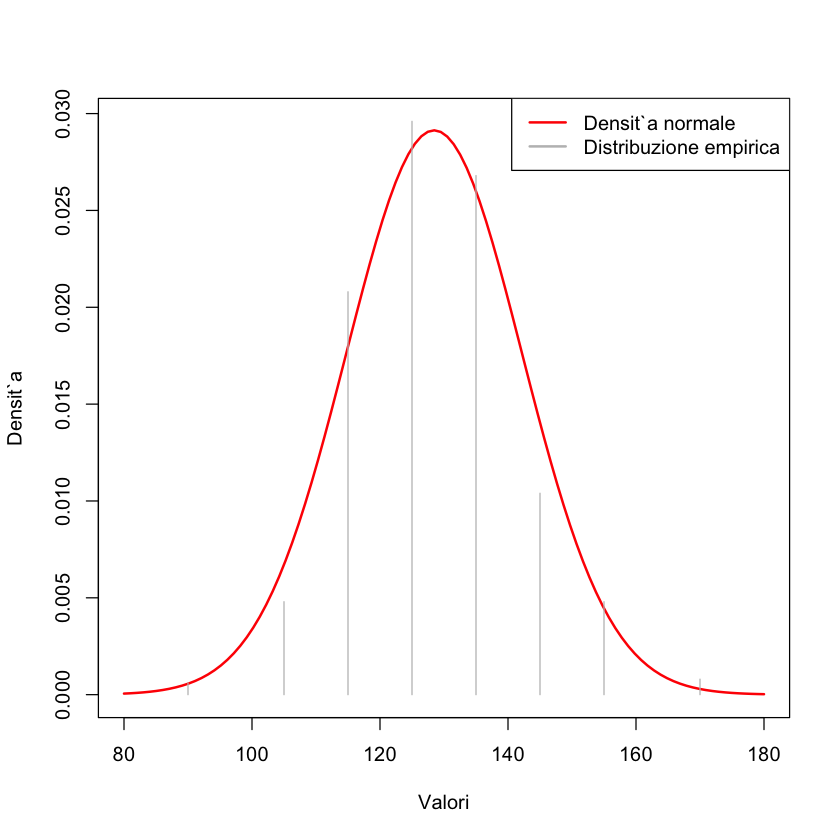

In [11]:
# Definire una funzione che permette di effettuare 
# il test non parametrico di adattamento alla distribuzione normale
# senza accorpamento delle classi.</br>

# La funzione prende in input:
# 1. un vettore relativo agli estremi delle classi osservate
# 2. eventualmente, se conosciuti, i valori dei parametri
# 3. un vettore con le frequenze associate a ogni classe
# 4. il livello di significatività

# La funzione restituisce:
# 1. il valore della statistica test
# 2. il valore critico della statistica test
# 3. La decisione (Es: "non si rifiuta H0")
# 4. il pvalue del test
# 5. un grafico che mostra un istogramma della distribuzione 
# empirica con, sovrapposta, la funzione di densità della variabile casuale normale di riferimento

test_normale <- function(estremi_classi, parametri = NULL, frequenze, alpha = 0.05) {

    # Dati osservati
    vettore_medie <- c(length(estremi_classi) - 1) # Punti medi degli intervalli
    for (i in 1:(length(estremi_classi) - 1)) {
    vettore_medie[i] <- (estremi_classi[i] + estremi_classi[i + 1]) / 2
    }
    frequenze_oss <- frequenze

    cat("Velocità medie:", vettore_medie, "\n")
    cat("Frequenze osservate iniziali:", frequenze_oss, "\n")

    # Calcolo della media e varianza campionaria
    media_camp <- sum(vettore_medie * frequenze_oss) / sum(frequenze_oss)
    varianza_CC <- sum(frequenze_oss * (vettore_medie - media_camp)^2) / (sum(frequenze_oss) - 1)
    sd_CC <- sqrt(varianza_CC)

    cat("Media Campionaria:", media_camp, "\n")
    cat("Varianza Campionaria Corretta:", varianza_CC, "\n")
    cat("Deviazione standard Campionaria Corretta:", sd_CC, "\n")

    # Standardizzazione degli intervalli originali
    limiti_standardizzati <- (estremi_classi - media_camp) / sd_CC
    cat("Limiti degli intervalli standardizzati:", "\n", limiti_standardizzati, "\n")

    # Calcolo delle probabilità teoriche per la distribuzione normale
    prob_teo <- rep(0, 10)
    prob_teo[1] <- pnorm(limiti_standardizzati[1])
    for (i in 2:(length(prob_teo))) {
    prob_teo[i] <- pnorm(limiti_standardizzati[i]) - pnorm(limiti_standardizzati[i - 1])
    }
    prob_teo[length(prob_teo)] <- 1 - pnorm(limiti_standardizzati[length(prob_teo) - 1])
    cat("Probabilità teoriche:", "\n", prob_teo, "\n")

    # Calcolo delle frequenze attese
    frequenze_teoriche <- prob_teo * sum(frequenze_oss)
    cat("Frequenze teoriche:", "\n", frequenze_teoriche, "\n")

    # Frequenze teoriche aggiustate
    frequenze_teoriche_agg <- numeric(length(frequenze_oss))
    frequenze_teoriche_agg[1] <- frequenze_teoriche[1] + frequenze_teoriche[2]
    for (i in 2:(length(frequenze_teoriche_agg) - 1)) {
    frequenze_teoriche_agg[i] <- frequenze_teoriche[i + 1]
    }
    frequenze_teoriche_agg[length(frequenze_teoriche_agg)] <- 
        frequenze_teoriche[length(frequenze_teoriche)] + frequenze_teoriche[length(frequenze_teoriche) - 1]

    # Calcolo della statistica test chi-quadro
    chi_sq <- sum((frequenze_oss - frequenze_teoriche_agg)^2 / frequenze_teoriche_agg)
    cat("Statistica test chi-quadro:", chi_sq, "\n")

    # Gradi di libertà
    df <- length(frequenze_oss) - 1 - 2 # Numero categorie - 1 - parametri stimati
    cat("Gradi di libertà:", df, "\n")

    # Calcolo del valore critico per α = 0.05
    chi_critico <- qchisq(0.95, df)
    cat("Valore critico:", chi_critico, "\n")

    # Calcolo del p-value
    p_value <- 1 - pchisq(chi_sq, df)
    cat("p-value:", p_value, "\n")

    # Decisione
    if (chi_sq > chi_critico) {
        decisione <- print("Rifiutiamo l'ipotesi nulla: la distribuzione non è normale.")
    } else {
        decisione <- print("Non possiamo rifiutare l'ipotesi nulla: la distribuzione potrebbe essere normale.")
    }


    # # Grafico

    x <- seq(min(estremi_classi), max(estremi_classi), length.out = 100)
    y <- dnorm(x, mean = media_camp, sd = sd_CC)
    # Width of class intervals
    class_widths <- diff(estremi_classi)

    # Adjusted frequencies to match density scale
    adjusted_frequencies <- frequenze_oss / sum(frequenze_oss) / class_widths

    # Scaling factor for plot
    max_scale <- max(c(y, adjusted_frequencies))


    par(bg="white")
    plot(x, y, 
        type = "l", 
        col = "red", 
        lwd = 2, 
        xlab = "Valori", 
        ylab = "Densità",
        ylim = c(0, max_scale))
    lines(vettore_medie, adjusted_frequencies, 
        type = "h",
        col = "grey")
    legend("topright", legend = c("Densità normale", "Distribuzione empirica"), 
        col = c("red", "grey"), lty = 1, lwd = 2)

    # Restituzione dei risultati
    return(list(statistica_test = chi_sq, valore_critico = chi_critico, 
                decisione = decisione, p_value = p_value))


}   

# esempio di utilizzo della funzione
estremi_intervalli_originali <- c(80, 100, 110, 120, 130, 140, 150, 160, 180)
frequenze_oss <- c(3, 12, 52, 74, 67, 26, 12, 4)
test_normale(estremi_intervalli_originali, frequenze = frequenze_oss)


## <span style="color:#e6550d">Distribuzione <b><i>Uniforme (Parametri Noti)</i></b> (Esercizio 1 Slides)</span>

![Screenshot 2024-01-03 at 10.05.58.png](<attachment:Screenshot 2024-01-03 at 10.05.58.png>) ![Screenshot 2024-01-03 at 10.06.09.png](<attachment:Screenshot 2024-01-03 at 10.06.09.png>)
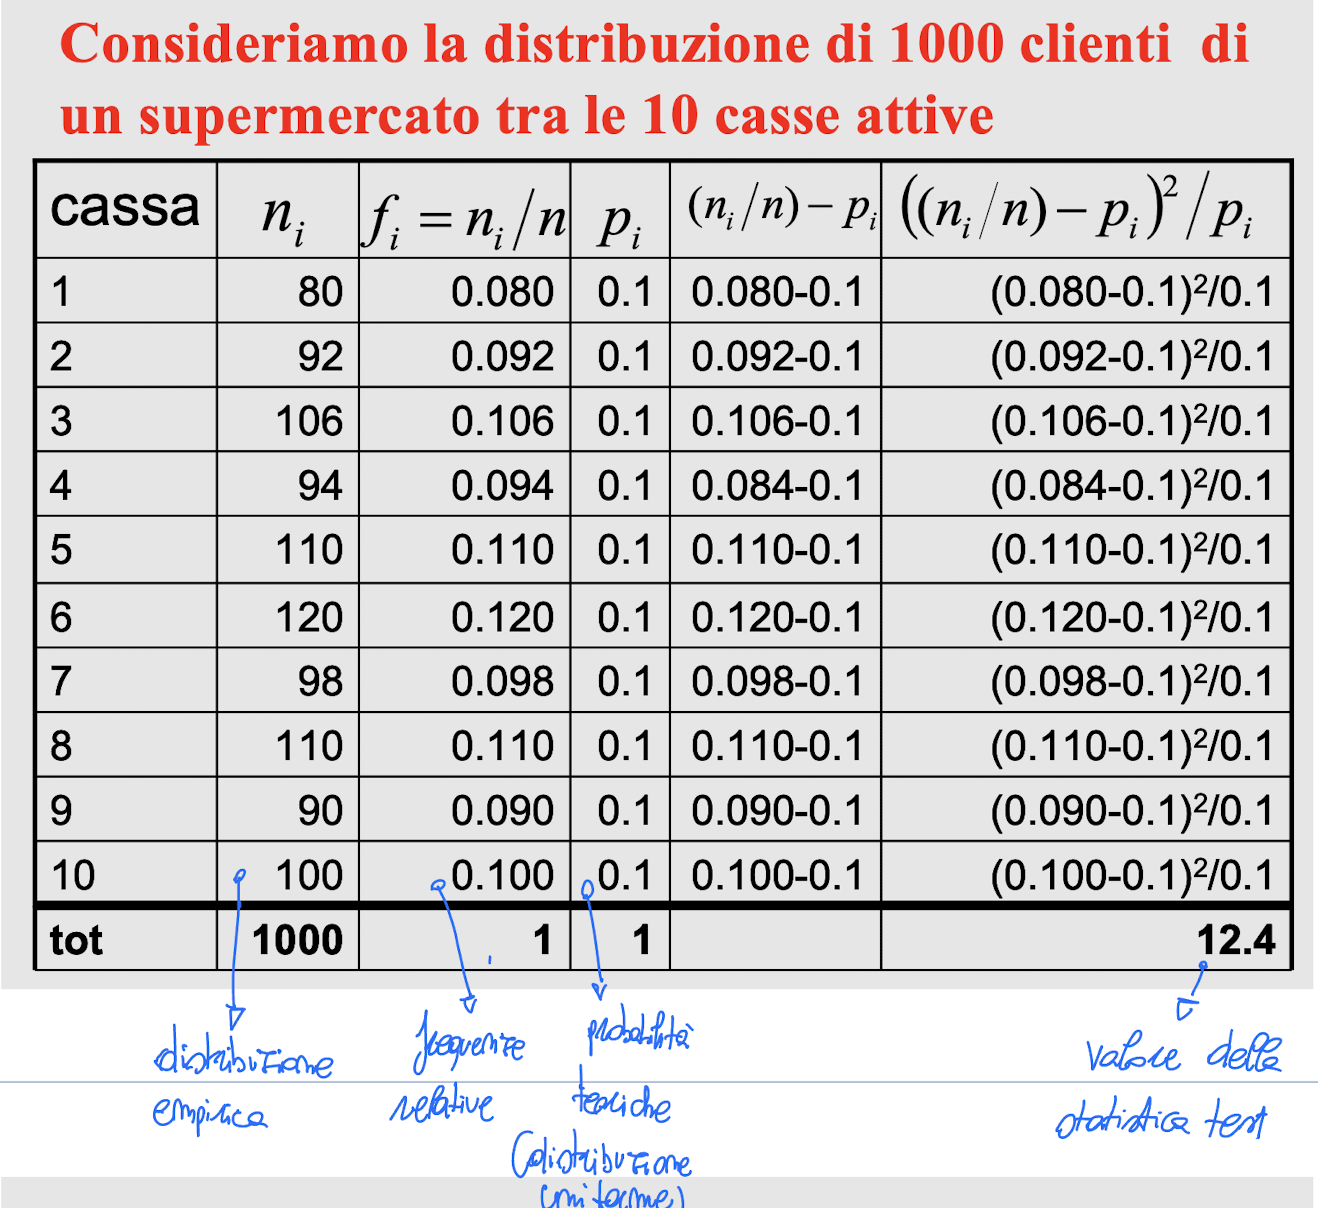
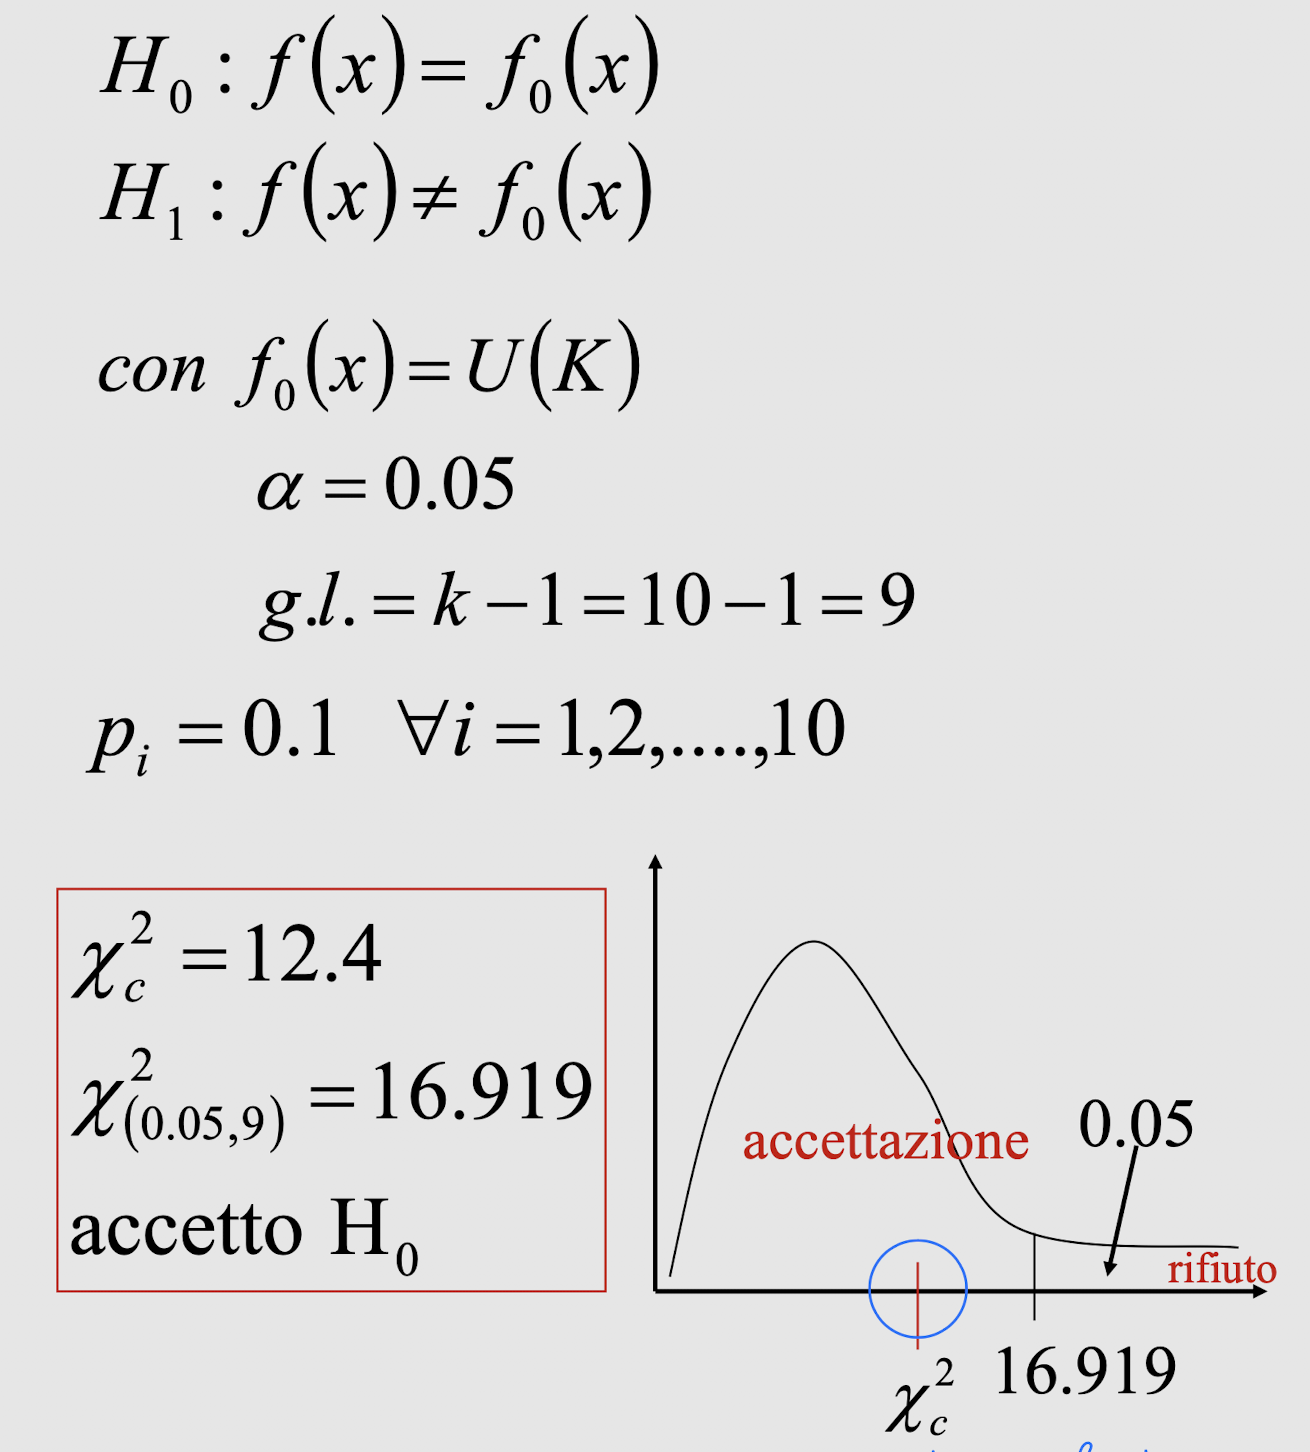

In [73]:
# Data Setup
casse <- 1:10
# Numero di clienti per cassa
clienti <- c(80, 92, 106, 94, 110, 120, 98, 110, 90, 100)  

totale_clienti <- 1000
# Probabilità teoriche assumendo che ogni cassa abbia la stessa probabilità di essere scelta
probabilita_teoriche <- 0.1  

# Calculating observed frequency and chi-square statistic components
frequenze_relative <- clienti / totale_clienti
# frequenze_relative
componenti_chi_quadro <- 
    ((frequenze_relative - probabilita_teoriche)^2) / probabilita_teoriche

# Output the results
data.frame(casse, clienti, frequenze_relative, probabilita_teoriche, componenti_chi_quadro)

# Summing up the chi-square components to get the chi-square statistic
Xcalcolato <- sum(componenti_chi_quadro) * totale_clienti
cat("Chi-Quadro Calcolato:", Xcalcolato, "\n")

# Calcolo del valore critico per α = 0.05
Xcrit <- qchisq(0.95, length(casse) - 1)
cat("Valore critico Xcrit:", Xcrit, "\n")

# Decisione
if (Xcalcolato > Xcrit) {
  cat("Rifiutiamo l'ipotesi nulla: la distribuzione non è uniforme.\n")
} else {
  cat("Non possiamo rifiutare l'ipotesi nulla: la distribuzione potrebbe essere uniforme.\n")
}


casse clienti frequenze_relative probabilita_teoriche componenti_chi_quadro
1   1     80     0.080              0.1                  0.00400              
2   2     92     0.092              0.1                  0.00064              
3   3    106     0.106              0.1                  0.00036              
4   4     94     0.094              0.1                  0.00036              
5   5    110     0.110              0.1                  0.00100              
6   6    120     0.120              0.1                  0.00400              
7   7     98     0.098              0.1                  0.00004              
8   8    110     0.110              0.1                  0.00100              
9   9     90     0.090              0.1                  0.00100              
10 10    100     0.100              0.1                  0.00000

Chi-Quadro Calcolato: 12.4 
Valore critico Xcrit: 16.91898 
Non possiamo rifiutare l'ipotesi nulla: la distribuzione potrebbe essere uniforme.


## <span style="color:#e6550d">Distribuzione di <b><i>Binomiale (Parametri Noti)</i></b> (Esercizio 2 Slides)</span>

![Screenshot 2024-01-03 at 10.07.03.png](<attachment:Screenshot 2024-01-03 at 10.07.03.png>) ![Screenshot 2024-01-03 at 10.07.14.png](<attachment:Screenshot 2024-01-03 at 10.07.14.png>)
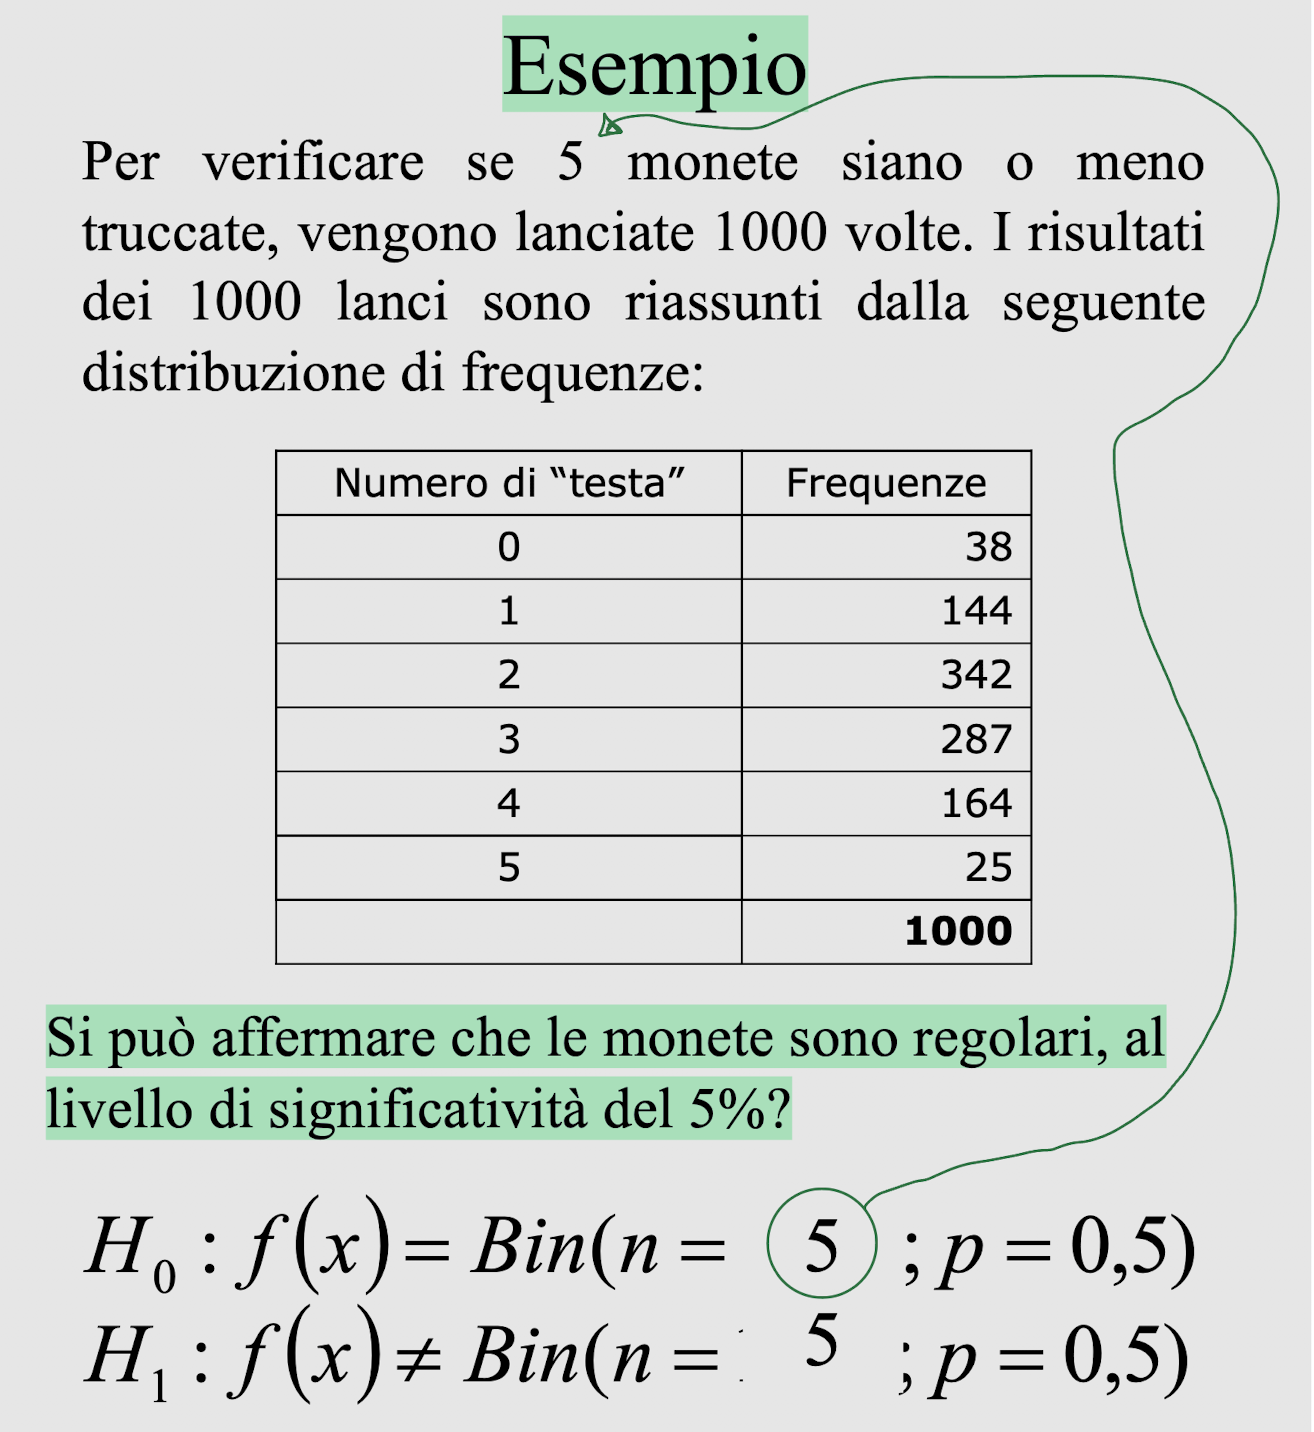
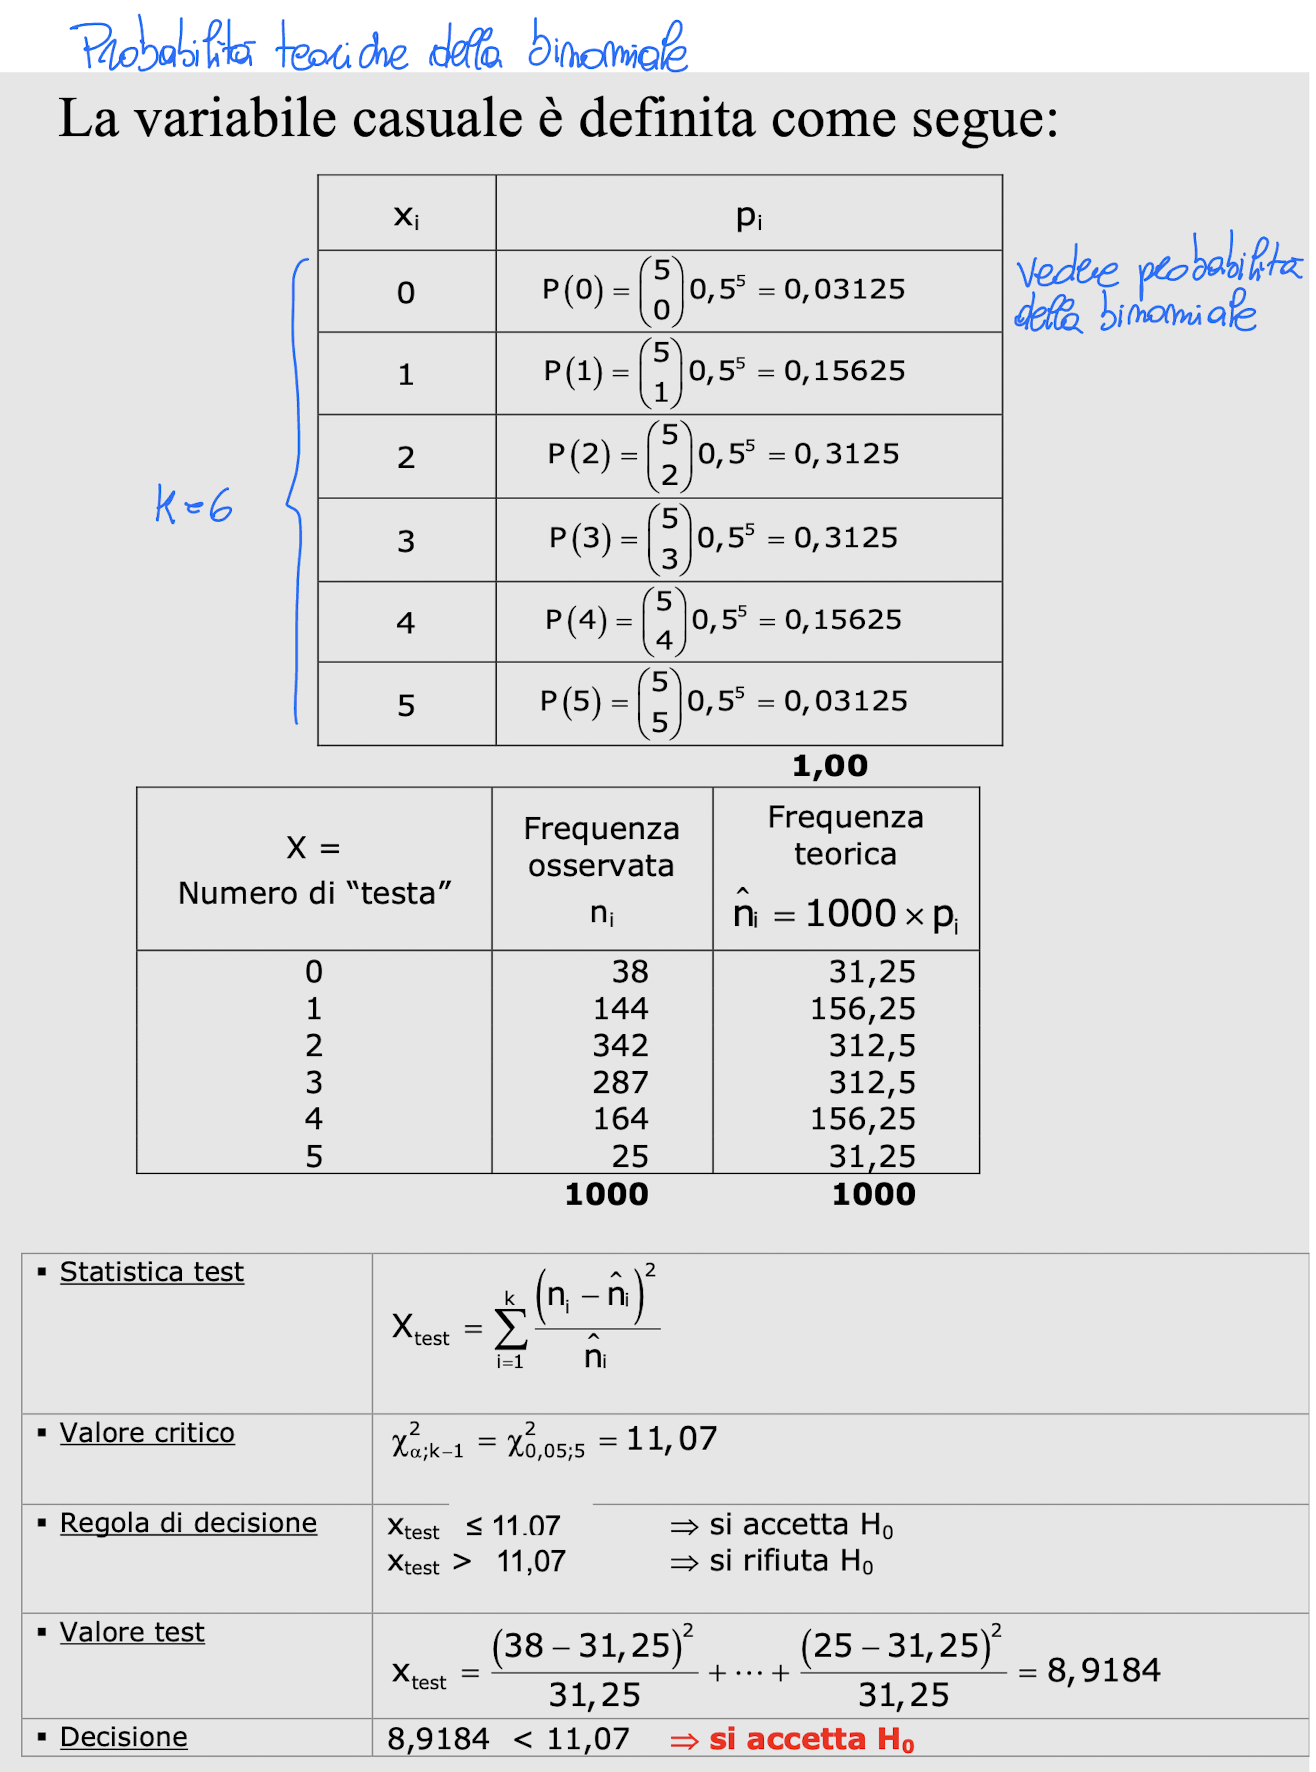

In [74]:
num_test <- 0:5
frequenze_oss <- c(38, 144, 342, 287, 164, 25)
tot_lanci <- sum(frequenze_oss)

# Calcolo delle probabilità teoriche
prob_teo <- dbinom(num_test, size = 5, prob = 0.5) * tot_lanci
cat("Probabilita teoriche:", prob_teo, "\n")

# Calcolo della statistica test chi-quadro
chi_sq <- sum((frequenze_oss - prob_teo)^2 / prob_teo)
cat("Statistica test chi-quadro:", chi_sq, "\n")

# Gradi di libertà
df <- length(frequenze_oss) - 1 # Numero categorie - 1
cat("Gradi di liberta:", df, "\n")

# Calcolo del valore critico per α = 0.05
chi_critico <- qchisq(0.95, df)
cat("Valore critico:", chi_critico, "\n")

# Decisione
if (chi_sq > chi_critico) {
  cat("Rifiutiamo l'ipotesi nulla: la distribuzione non è binomiale.")
} else {
  cat("Non possiamo rifiutare l'ipotesi nulla: la distribuzione potrebbe essere binomiale.")
}

Probabilita teoriche: 31.25 156.25 312.5 312.5 156.25 31.25 
Statistica test chi-quadro: 8.9184 
Gradi di liberta: 5 
Valore critico: 11.0705 
Non possiamo rifiutare l'ipotesi nulla: la distribuzione potrebbe essere binomiale.

# <span style="color:#756bb1">Test di Indipendenza</span>

## <span style="color:#e6550d">Test di <b><i>Indipendenza</i></b> (Esercizio 4)</span>

![Screenshot 2024-01-02 at 15.39.21.png](<attachment:Screenshot 2024-01-02 at 15.39.21.png>) ![Screenshot 2024-01-02 at 15.39.36.png](<attachment:Screenshot 2024-01-02 at 15.39.36.png>)
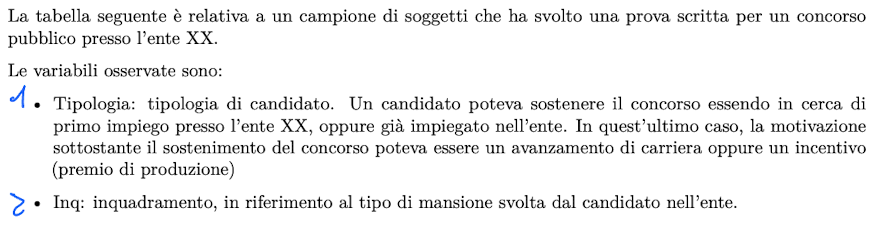
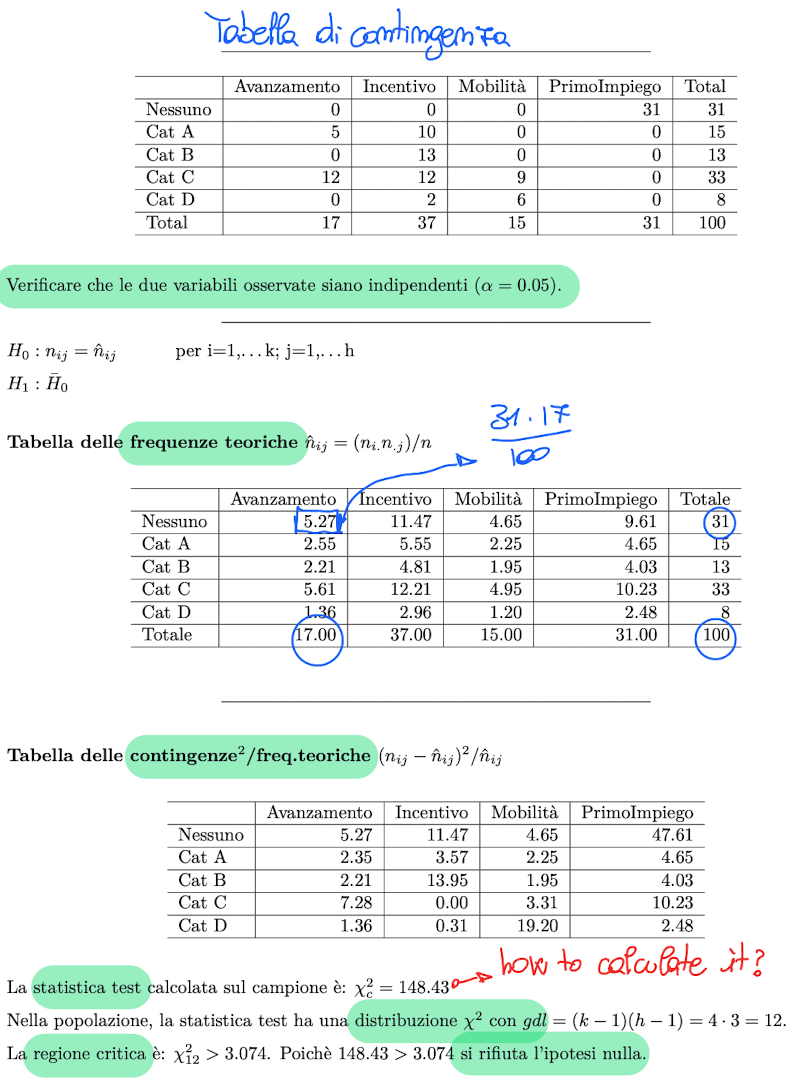

In [75]:
# L'ipotesi nulla e' che le frequenze osservate siano uguali alle frequenze teoriche

# Dati osservati
freq_obs <- matrix(c(0, 5, 0, 12, 0, 0, 10, 13, 12, 2, 0, 0, 0, 9, 6, 31, 0, 0, 0, 0), 
    nrow = 4, 
    byrow = TRUE)

colnames(freq_obs) <- c("Nessuno", "Cat A", "Cat B", "Cat C", "Cat D") # Nomi delle colonne
rownames(freq_obs) <- c("Avanzamento", "Incentivo", "Mobilità", "PrimoImpiego") # Nomi delle righe
cat("Tabella di contingenza osservata:\n")
print(freq_obs)

# Calcolo delle frequenze teoriche
freq_teo <- chisq.test(freq_obs)$expected
cat("\nTabella delle frequenze teoriche:\n")
print(freq_teo)

# Calcolo della statistica del test chi-quadro
chi_sq <- sum((freq_obs - freq_teo)^2 / freq_teo)
df <- (nrow(freq_obs) - 1) * (ncol(freq_obs) - 1) # Gradi di libertà
cat("\nChi-quadro statistico:", chi_sq, "\n")
cat("Gradi di libertà:", df, "\n")

# Calcolo del valore critico per α = 0.05
chi_critico <- qchisq(0.05, df)
cat("Valore critico del chi-quadro:", chi_critico, "\n")

# Decisione
if (chi_sq > chi_critico) {
    cat("Rifiutiamo l'ipotesi nulla: le variabili non sono indipendenti.\n")
} else {
    cat("Non possiamo rifiutare l'ipotesi nulla: le variabili potrebbero essere indipendenti.\n")
}


Tabella di contingenza osservata:
             Nessuno Cat A Cat B Cat C Cat D
Avanzamento        0     5     0    12     0
Incentivo          0    10    13    12     2
Mobilit`a          0     0     0     9     6
PrimoImpiego      31     0     0     0     0


Warning message in chisq.test(freq_obs):
"L'approssimazione al Chi-quadrato potrebbe essere inesatta"



Tabella delle frequenze teoriche:
             Nessuno Cat A Cat B Cat C Cat D
Avanzamento     5.27  2.55  2.21  5.61  1.36
Incentivo      11.47  5.55  4.81 12.21  2.96
Mobilit`a       4.65  2.25  1.95  4.95  1.20
PrimoImpiego    9.61  4.65  4.03 10.23  2.48

Chi-quadro statistico: 148.1341 
Gradi di libert`a: 12 
Valore critico del chi-quadro: 5.226029 
Rifiutiamo l'ipotesi nulla: le variabili non sono indipendenti.


## <span style="color:#e6550d">Test di <b><i>Indipendenza</i></b> (Esercizio 3 Slides)</span>

![Screenshot 2024-01-03 at 10.14.43.png](<attachment:Screenshot 2024-01-03 at 10.14.43.png>) ![Screenshot 2024-01-03 at 10.14.50.png](<attachment:Screenshot 2024-01-03 at 10.14.50.png>)
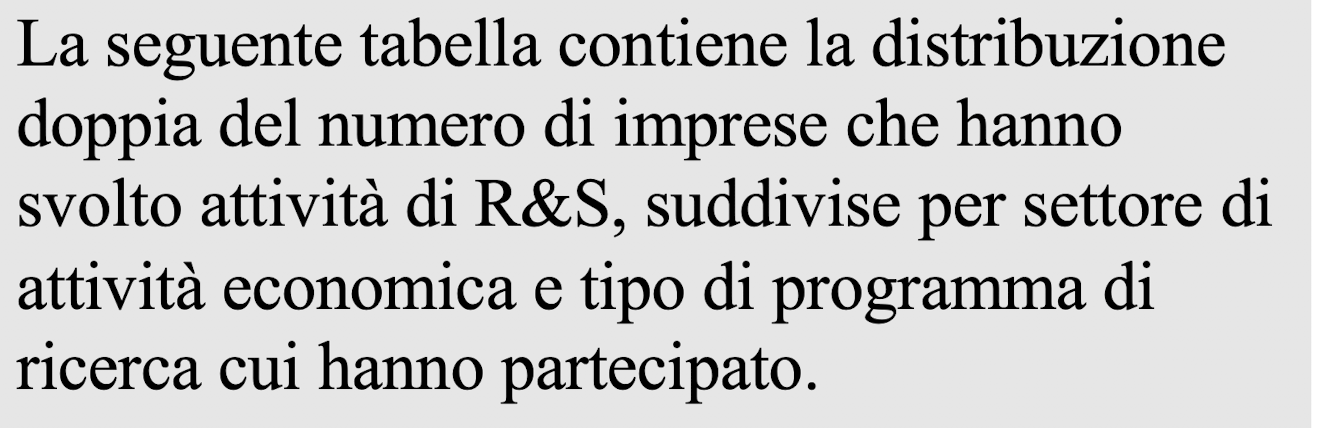
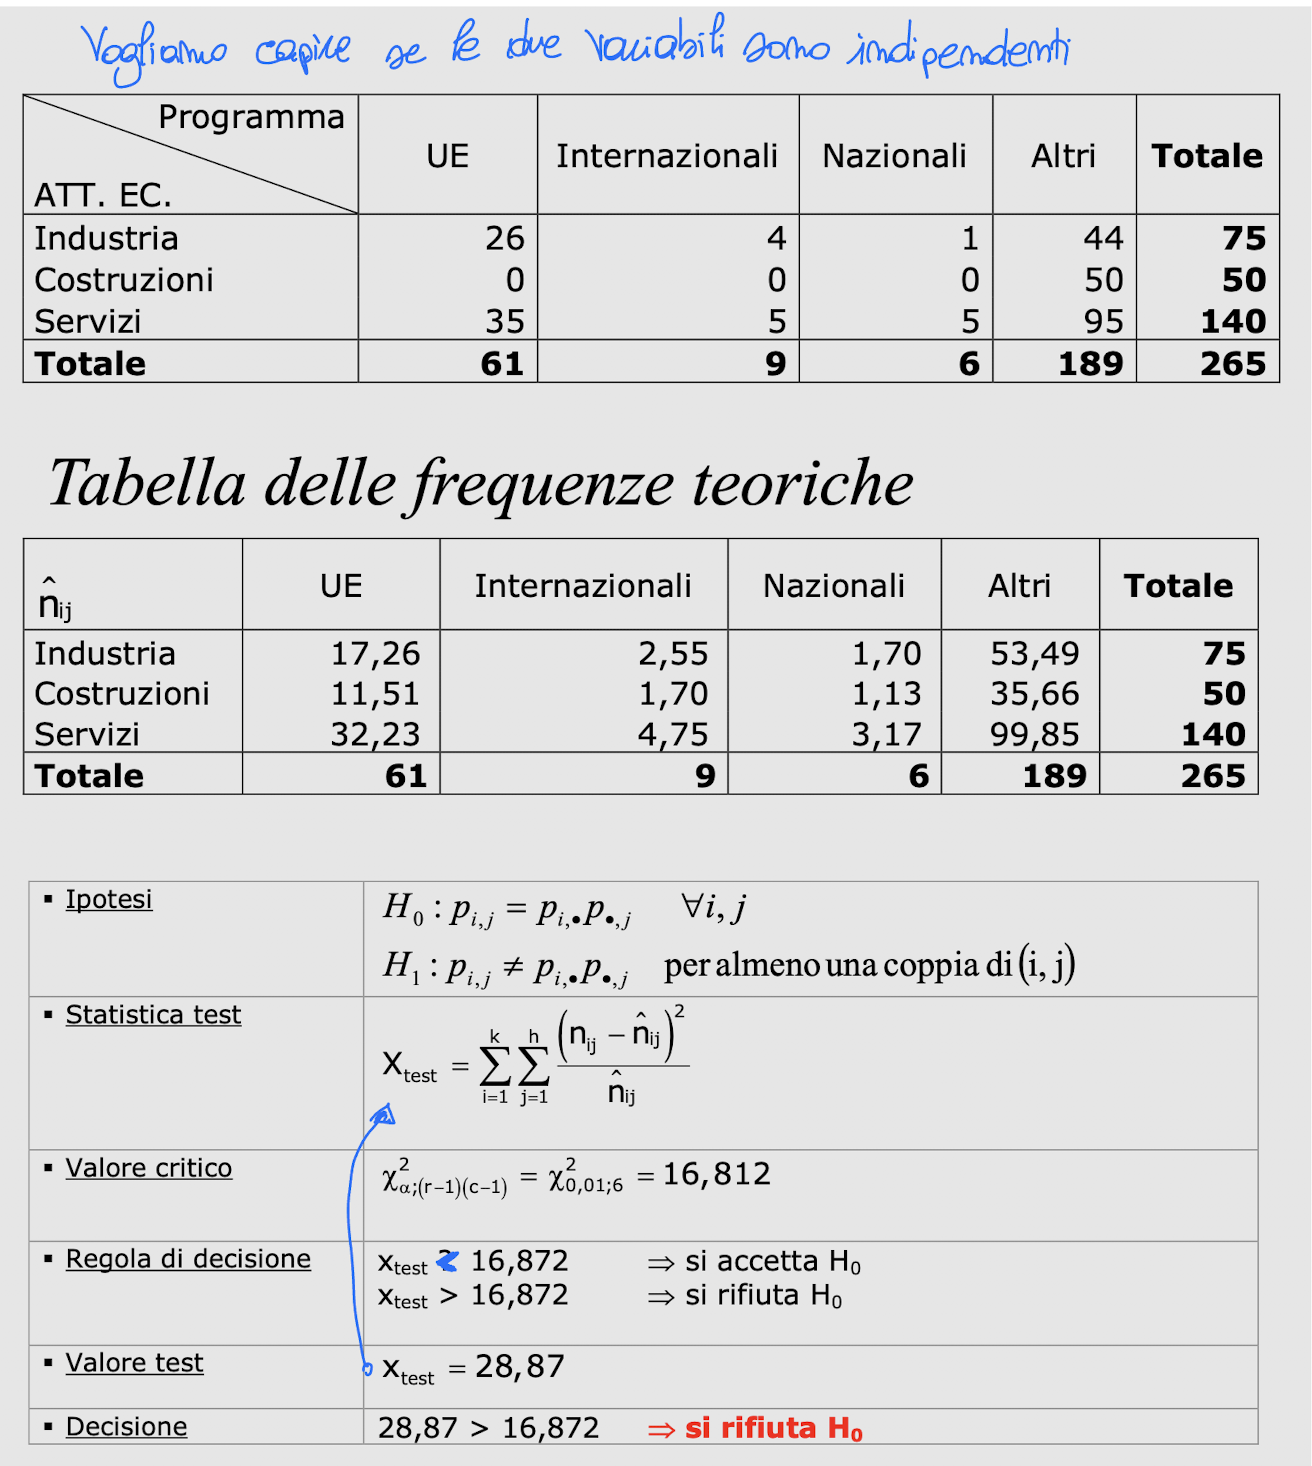

In [76]:
# Observed frequenze
observed <- matrix(c(26, 4, 1, 44,
                     0, 0, 0, 50,
                     35, 5, 5, 95), 
                   nrow = 3, byrow = TRUE)
colnames(observed) <- c("UE", "Internazionali", "Nazionali", "Altri")
rownames(observed) <- c("Industria", "Costruzioni", "Servizi")

# Expected frequenze
totals <- list("row" = apply(observed, 1, sum), "col" = apply(observed, 2, sum))
expected <- outer(totals$row, totals$col) / sum(observed)

# Chi-square test
chi_square <- sum((observed - expected)^2 / expected)
df <- (nrow(observed) - 1) * (ncol(observed) - 1)

# Critical value from chi-square distribution with (r-1)(c-1) degrees of freedom
critical_value <- qchisq(0.99, df) # Change the 0.95 to the desired confidence level

# Decision rule
decision <- ifelse(chi_square < critical_value, "Non Rifiuto H0", "Rifiuto H0")

# Output
list("Observed" = observed,
     "Expected" = expected,
     "Chi_square_statistic" = chi_square,
     "Degrees_of_freedom" = df,
     "Critical_value" = critical_value,
     "Decision" = decision)


$Observed
            UE Internazionali Nazionali Altri
Industria   26              4         1    44
Costruzioni  0              0         0    50
Servizi     35              5         5    95

$Expected
                  UE Internazionali Nazionali    Altri
Industria   17.26415       2.547170  1.698113 53.49057
Costruzioni 11.50943       1.698113  1.132075 35.66038
Servizi     32.22642       4.754717  3.169811 99.84906

$Chi_square_statistic
[1] 28.86934

$Degrees_of_freedom
[1] 6

$Critical_value
[1] 16.81189

$Decision
[1] "Reject H0"